In [1]:
import os
from joblib import dump, load
import pickle
import sys
sys.path.insert(0, os.path.join(os.getcwd(),os.pardir))
from collections import Counter
import numpy as np
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
from nltk.stem.lancaster import LancasterStemmer
from mpl_toolkits.mplot3d import Axes3D

import sklearn
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.calibration import CalibratedClassifierCV
from sklearn.svm import LinearSVC

In [26]:
plt.rc("savefig", dpi=400)

In [2]:
svc = load("ml_results/Logistic Regression.joblib")#load("best_linearSVC.joblib")

In [3]:
FILES  = ["train","val","test"]
FOLDER = os.path.join(os.getcwd(),os.pardir,"recipe_1m_analysis","data")
file = FILES[0]

In [4]:
enc = load("ml_results/scikit_vocab_cuisine.joblib")

In [5]:
with open(os.path.join(FOLDER,"recipe1m_"+file+".pkl"),"rb") as f:
    data = pickle.load(f)

In [6]:
ingr_input = [";".join([ingr.name for ingr in recipe["ingredients"]]) for recipe in data.values() ]

In [7]:
vocab = load("ml_results/scikit_vocab.joblib")

In [8]:
cv = CountVectorizer(vocabulary=vocab)
X = cv.fit_transform(ingr_input)

In [9]:
prediction = svc.predict(X)
len(prediction)

447341

In [10]:
str_pred =enc.inverse_transform(prediction)

In [11]:
counter_svc=Counter(str_pred)

In [12]:
len(str_pred)

447341

In [13]:
for i,v in enumerate(data.values()):
    v["cuisine"]=str_pred[i]

In [14]:
with open(os.path.join(FOLDER,"recipe1m_"+file+"_cuisine_log_reg.pkl"), "wb") as f:
    pickle.dump(data, f)

## Load NN classified file

In [15]:
with open(os.path.join(FOLDER,"recipe1m_"+file+"_cuisine_nn.pkl"),"rb") as f:
    data_nn = pickle.load(f)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\TEMP.PKAPRIME.000.001\\Documents\\food_recipe\\cuisine_classification\\..\\recipe_1m_analysis\\data\\recipe1m_train_cuisine_nn.pkl'

In [16]:
with open(os.path.join(os.getcwd(),"results","vocab_cuisine.pkl"), "rb") as f:
    vocab_cuisine = pickle.load(f)

In [17]:
for el in counter_svc.keys():
    vocab_cuisine.add_word(el)

In [18]:
counter_nn=Counter([recp["cuisine"] for recp in data_nn.values()])

NameError: name 'data_nn' is not defined

In [19]:
coherence_matrix = np.zeros((len(vocab_cuisine.word2idx),len(vocab_cuisine.word2idx)),dtype=np.int)
np.set_printoptions(suppress=True)
for idx,recp in data_nn.items():
    coherence_matrix[vocab_cuisine.word2idx[recp["cuisine"]]][vocab_cuisine.word2idx[data[idx]["cuisine"]]]+=1
or_northUS = coherence_matrix[0][0]
coherence_matrix[0][0]=16000
or_northUS

NameError: name 'data_nn' is not defined

In [23]:
coherence_matrix = np.array([
    [16000,15421,6742,11563,3807,1660,2014,457,1210,992,798,1082],
    [4461,11679,281,644,72,49,78,4,68,34,43,34],
    [2046,360,9268,25,44,30,59,31,17,9,18,16],
    [731,129,11,2012,5,4,6,1,11,2,1,19],
    [1425,131,68,83,3347,473,120,192,17,4,14,11],
    [467,74,44,39,646,930,15,10,18,2,6,15],
    [387,29,20,25,104,16,1696,16,14,2,24,26],
    [16,2,2,0,42,1,2,43,0,0,1,0],
    [3,5,0,0,0,0,0,0,5,2,2,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
    [7,0,2,0,0,0,8,0,0,0,7,0],
    [0,0,0,0,0,0,0,0,0,0,0,0],
                                ])

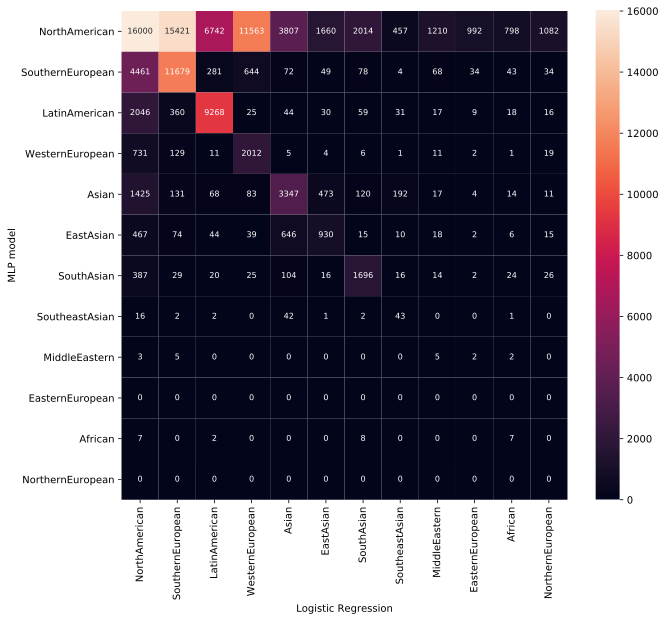

In [27]:
%config InlineBackend.figure_format = 'svg'
df_cm = pd.DataFrame(coherence_matrix, index = vocab_cuisine.word2idx.keys(),
                  columns = vocab_cuisine.word2idx.keys())
plt.figure(figsize=(10,9))
#sn.set(font_scale=0.8) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt='g') # font size
plt.xlabel("Logistic Regression")
plt.ylabel("MLP model")
plt.savefig("F:\\user\\Google Drive\\Catherning Folder\\THU\\Thesis\\Work\\Thesis figures\\log_reg_nn.png", bbox_inches='tight')

In [21]:
or_northUS/len(data)

NameError: name 'or_northUS' is not defined

In [ ]:
np.trace(coherence_matrix)-coherence_matrix[0][0]+or_northUS

In [ ]:
(np.trace(coherence_matrix)-coherence_matrix[0][0]+or_northUS)/len(data)

### 95% confidence

In [ ]:
#95% pred
threshold=0.95
y_pred_prob = svc.predict_proba(X)
max_prob = y_pred_prob.max(axis=1)
y_pred = y_pred_prob.argmax(axis=1)

to_del = np.argwhere(max_prob < threshold).T[0]

partial_y_pred = np.delete(y_pred,to_del)
partial_y_pred

In [ ]:
len(partial_y_pred)

In [ ]:
log_reg95count = Counter(partial_y_pred)

In [ ]:
log_reg95count

In [ ]:
with open(os.path.join(FOLDER,"recipe1m_"+file+"_cuisine_nn0.95.pkl"),"rb") as f:
    data_nn95 = pickle.load(f)

In [ ]:
predicted = [recp["cuisine"] for recp in data_nn95.values() if "cuisine" in recp]

In [ ]:
len(predicted)

In [ ]:
nn95count = Counter(predicted)

In [ ]:
nn95count

In [ ]:
len(data)

In [ ]:
coherence_matrix = np.zeros((len(nn95count),len(log_reg95count)),dtype=np.int)
np.set_printoptions(suppress=True)
for idx,recp in data_nn95.items():
    coherence_matrix[vocab_cuisine.word2idx[recp["cuisine"]]][vocab_cuisine.word2idx[data[idx]["cuisine"]]]+=1
print(coherence_matrix[0][0])
coherence_matrix[0][0]=14000

In [ ]:
df_cm = pd.DataFrame(coherence_matrix, index = counter_nn.keys(),
                  columns = counter_svc.keys())
plt.figure(figsize=(10,9))
#sn.set(font_scale=0.8) # for label size
sn.heatmap(df_cm, annot=True, annot_kws={"size": 8}, fmt='g') # font size
plt.xlabel("Linear SVC model")
plt.ylabel("MLP model")
plt.show()
